In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import cmocean
import seaborn as sns
import datetime
import gsw
import imp

%matplotlib inline

plt.rcParams['font.size'] = '14'

In [ ]:
workingdir = r'C:\Users\mijakes\checkouts\phd-public'
os.chdir(workingdir) 

In [2]:
import src.importData as imports
import src.settings as settings
import src.calc as calc

In [ ]:
my_path = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd','figures', 'chapter1_manuscript', 'revision_figures')

In [3]:
floatids = [8489, 8492, 8493]
ema = imports.importFloatData(floatids)

# datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'floats')
# ds = imports.sub_inertial_ds(ema, floatids, datadir, xdim = 'distance')

In [4]:
abs_vels = {}
rot_vels = {}

datadir = os.path.join(os.sep, 'Users', 'mijakes', 'checkouts', 'phd', 'data', 'floats')
                       
for floatid in floatids:
    #absolute velocities
    file = os.path.join(datadir, 'absolute_velocity', 'by_profile', 'abs_vel_%s_extra_qc.nc' %floatid)
    abs_vels[floatid] = xr.open_dataset(file)
    
    #rotated velocities
    file = os.path.join(datadir, 'rotated_velocity', 'by_profile', 'rot_vel_%s.nc' %floatid)
    rot_vels[floatid] = xr.open_dataset(file)

In [5]:
ds = imports.sub_inertial_ds(ema, floatids, datadir, xdim = 'profile')
ds_dist = imports.sub_inertial_ds(ema, floatids, datadir, xdim = 'distance', rot_vels = rot_vels)

In [6]:
(np.pi)/gsw.f(ema[8489].latitude[0])/3600

<xarray.DataArray 'latitude' ()>
array(-7.29175165)
Coordinates:
    latitude  float64 -55.14

In [7]:
depths = [0, 1600, 0, 1000, 1000, 1600, 0,    1600, 0, 1000, 1000, 1600, 0]
time =   [0, 4,    8, 10.5, 18.5, 20,   24,   28,  32, 34.5, 42.5, 44, 48]

Text(0.28, 0.4, 'Drift')

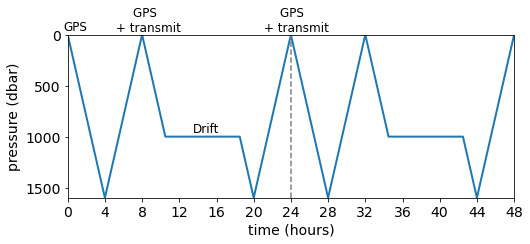

In [20]:
fig, ax = plt.subplots(figsize = (8,3))
plt.plot(time, depths, linewidth = 2)
ax.set_xticks(np.arange(0, 50, 4))
plt.ylim(0,1600)
ax.invert_yaxis()
ax.set_ylabel("pressure (dbar)")
ax.set_xlabel("time (hours)")

# ax.axvline(x = 0, linestyle = '--', c = 'grey')
ax.axvline(x = 24, linestyle = '--', c = 'grey')
# ax.axvline(x = 48, linestyle = '--', c = 'grey')
plt.xlim(0,48)

# add text
ax.text(-0.01, 1.03, f'GPS', transform = ax.transAxes, multialignment='center', fontsize = 12)
ax.text(0.1, 1.02, f'GPS \n + transmit', transform = ax.transAxes, multialignment='center', fontsize = 12)
ax.text(0.43, 1.02, f'GPS \n + transmit', transform = ax.transAxes, multialignment='center', fontsize = 12)
ax.text(0.28, 0.4, 'Drift', transform = ax.transAxes, multialignment='center', fontsize = 12)


In [21]:
# settings.save_figure(fig, my_path, 'float_profiling_pattern.png', dpi = 600, pad = 0.2)

In [10]:
d = {}
rs = {}
dx = {}
speed = {}
for floatid in floatids:
    d[floatid] = settings.distanceAsCoord(ema[floatid])
    rs[floatid] = calc.findRSperiod(ema[floatid])
    dx[floatid] = np.gradient(d[floatid].distance[rs[floatid]])
#     dx[floatid] = np.gradient(ds_dist[floatid].distance)
    speed[floatid] = calc.speed(ds_dist[floatid].u_abs, ds_dist[floatid].v_abs).mean(dim = 'pressure')
    

Text(0, 0.5, 'no. profiles')

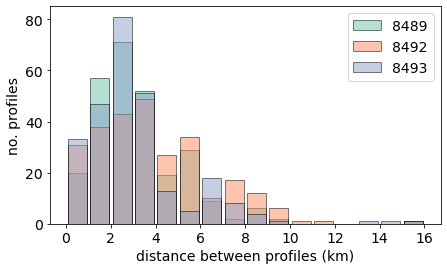

In [11]:
fig, ax = plt.subplots(figsize = (7,4))

i = 0
cols = ['#66c2a5', '#fc8d62', '#8da0cb']

for floatid in [8489, 8492, 8493]:
    n, bins, patches = plt.hist(x=dx[floatid], bins=np.arange(0, 17,1), color = cols[i], edgecolor='black',
                                alpha = 0.5, rwidth=0.85)
    i += 1
    
ax.set_xticks(np.arange(0,17,2))
plt.legend(floatids)
plt.xlabel('distance between profiles (km)')
plt.ylabel('no. profiles')

In [12]:
mean_dx = np.nanmean(np.concatenate([dx[8489], dx[8492], dx[8493]]))
mean_dx

3.3962155167511154

In [13]:
bins = np.arange(0, 17,1)

In [14]:
## plot mean speed associated with the profiles in these distance bins to show that where the mean separation distance is large the float is in a jet.

In [15]:
speed_ct = xr.DataArray(np.concatenate([speed[8489], speed[8492], speed[8493]]), dims = 'dx', 
             coords = dict(dx = ('dx', np.concatenate([dx[8489], dx[8492], dx[8493]]))))

In [17]:
binned_speed = speed_ct.groupby_bins('dx', bins =bins).mean()

bin_mid_points = (bins-(np.gradient(bins)[0]/2))[1:]

Text(0, 0.5, 'no. profiles')

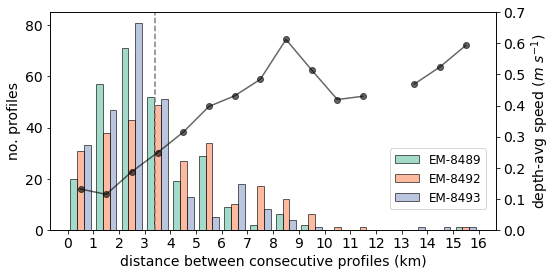

In [22]:
fig, ax = plt.subplots(figsize = (8,4))
n, bins, patches = plt.hist(x=[dx[8489], dx[8492], dx[8493]], bins=np.arange(0, 17,1), edgecolor='black', color = cols,
                            alpha = 0.6, stacked = False)

plt.legend(["EM-8489","EM-8492","EM-8493"], fontsize = 12, bbox_to_anchor=(-0.01, 0.3, 1., .102))
plt.axvline(x = mean_dx, linestyle = '--', c = 'grey')
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

ax2 = ax.twinx()
ax2.plot(bin_mid_points, binned_speed, c = 'k', alpha = 0.6)
ax2.scatter(bin_mid_points, binned_speed, c = 'k', alpha = 0.6)
ax2.set_ylabel('depth-avg speed ($m$ $s^{-1}$)')
ax2.set_ylim(0,0.7)

ax.set_xticks(np.arange(0,17,1))
ax.set_xlabel('distance between consecutive profiles (km)')
ax.set_ylabel('no. profiles')

Text(0, 0.5, 'no. profiles')

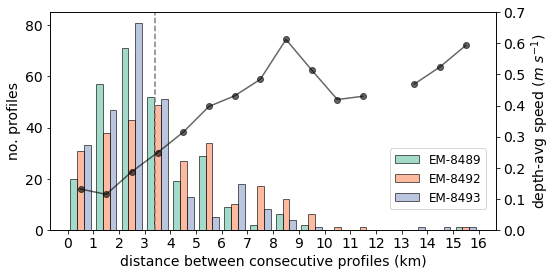

In [54]:
fig, ax = plt.subplots(figsize = (8,4))
n, bins, patches = plt.hist(x=[dx[8489], dx[8492], dx[8493]], bins=np.arange(0, 17,1), edgecolor='black', color = cols,
                            alpha = 0.6, stacked = False)

plt.legend(["EM-8489","EM-8492","EM-8493"], fontsize = 12, bbox_to_anchor=(-0.01, 0.3, 1., .102))
plt.axvline(x = mean_dx, linestyle = '--', c = 'grey')
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

ax2 = ax.twinx()
ax2.plot(bin_mid_points, binned_speed, c = 'k', alpha = 0.6)
ax2.scatter(bin_mid_points, binned_speed, c = 'k', alpha = 0.6)
ax2.set_ylabel('depth-avg speed ($m$ $s^{-1}$)')
ax2.set_ylim(0,0.7)

ax.set_xticks(np.arange(0,17,1))
ax.set_xlabel('distance between consecutive profiles (km)')
ax.set_ylabel('no. profiles')

In [23]:
# settings.save_figure(fig, my_path, 'dx_histogram.png', dpi = 600, pad = 0.2)